In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys

In [2]:
sys.path.append('src\plot_distributions.py')

In [3]:
# Loading the dataset
df = pd.read_csv('..\data\churn_data.csv')

In [4]:
#Creating a copy of the Data
df_copy = df.copy()

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    10000 non-null  object 
 1   Product_ID                     10000 non-null  object 
 2   Transaction_ID                 10000 non-null  object 
 3   Purchase_Frequency             10000 non-null  int64  
 4   Average_Order_Value            10000 non-null  float64
 5   Most_Frequent_Category         10000 non-null  object 
 6   Time_Between_Purchases         10000 non-null  int64  
 7   Region                         10000 non-null  object 
 8   Churn_Probability              10000 non-null  float64
 9   Lifetime_Value                 10000 non-null  float64
 10  Launch_Date                    10000 non-null  object 
 11  Peak_Sales_Date                10000 non-null  object 
 12  Season                         10000 non-null  

In [6]:
# Listing the numerical columns to analyze
num_cols = ["Purchase_Frequency", "Average_Order_Value", "Time_Between_Purchases", 
            "customer_tenure", "recency", "engagement_score"]

<Figure size 1200x800 with 0 Axes>

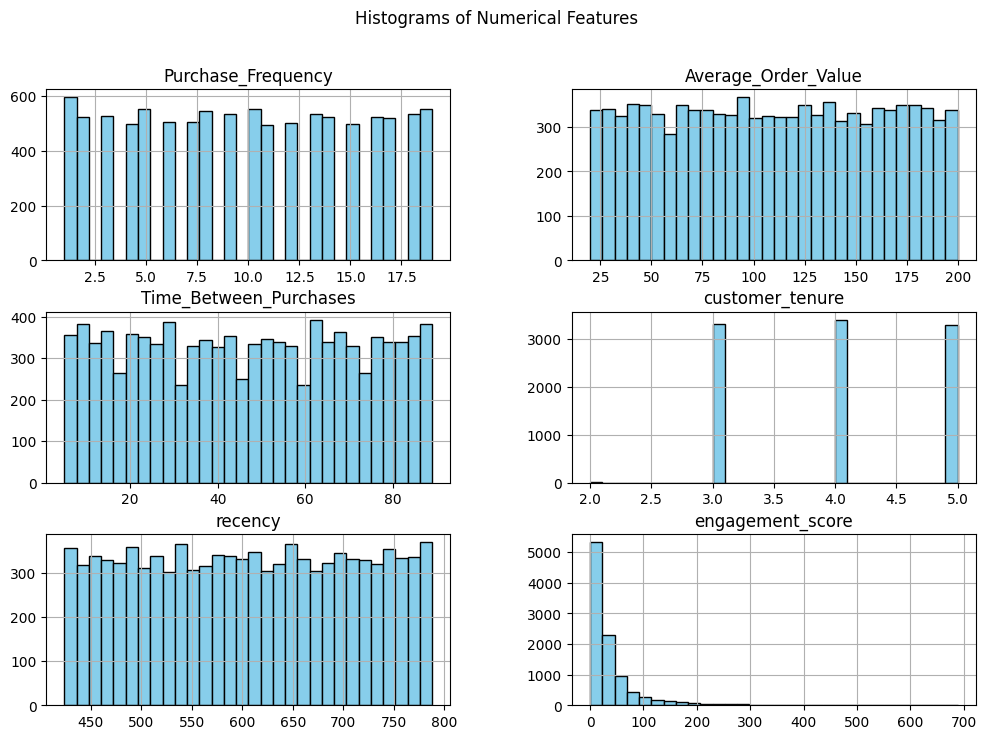

In [7]:
# Plotting histograms
plt.figure(figsize=(12, 8))
df_copy[num_cols].hist(bins=30, figsize=(12, 8), layout=(3, 2), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

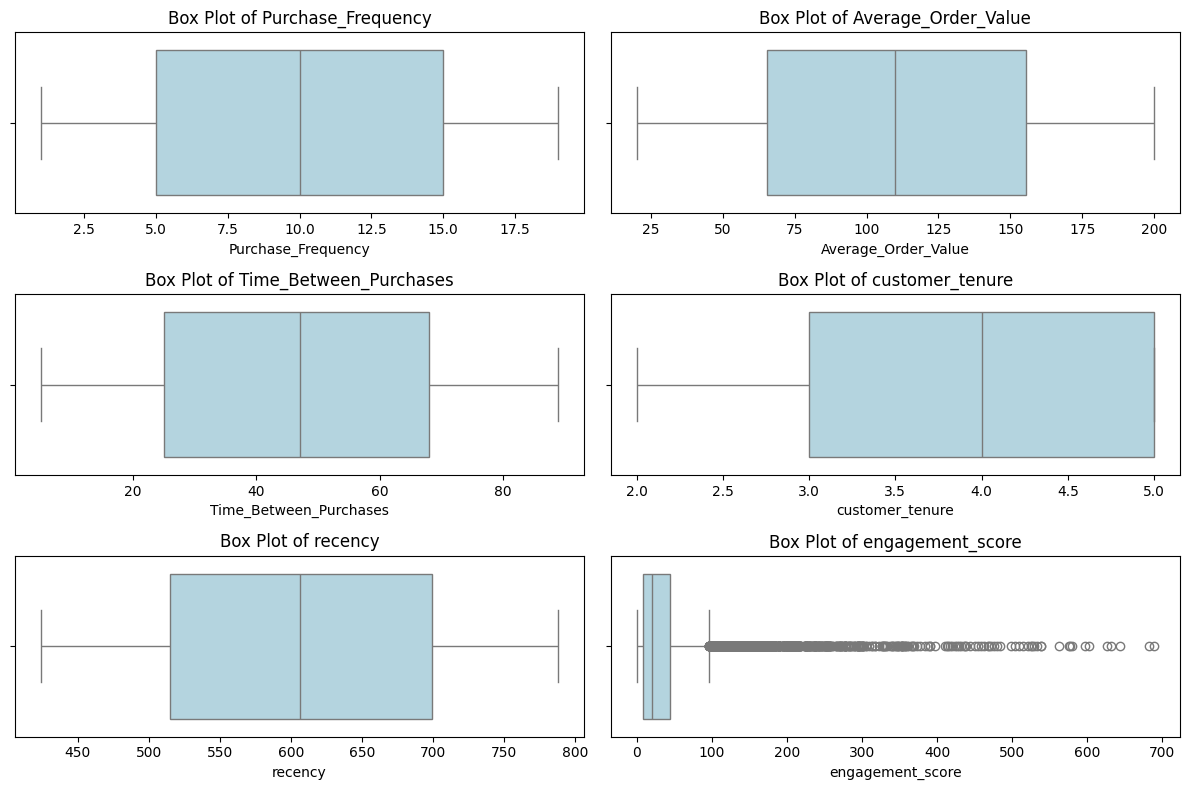

In [8]:
# Plotting box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_copy[col], color='lightblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

### From the above plots
- `customer_tenure` has only few distinct values so converting it to categorical variable
- `engagement_score` have very large values and outliers based on the histograms and box plot

In [9]:
# Converting customer_tenure to categorical
df_copy['customer_tenure'] = df_copy['customer_tenure'].astype('category')

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Customer_ID                    10000 non-null  object  
 1   Product_ID                     10000 non-null  object  
 2   Transaction_ID                 10000 non-null  object  
 3   Purchase_Frequency             10000 non-null  int64   
 4   Average_Order_Value            10000 non-null  float64 
 5   Most_Frequent_Category         10000 non-null  object  
 6   Time_Between_Purchases         10000 non-null  int64   
 7   Region                         10000 non-null  object  
 8   Churn_Probability              10000 non-null  float64 
 9   Lifetime_Value                 10000 non-null  float64 
 10  Launch_Date                    10000 non-null  object  
 11  Peak_Sales_Date                10000 non-null  object  
 12  Season                         10

In [11]:
# Applying Log Transformation (reduces skewness by compressing large values)

import numpy as np
df_copy['engagement_score_log'] = np.log1p(df_copy['engagement_score'])  # log(1 + x) avoids log(0) issues

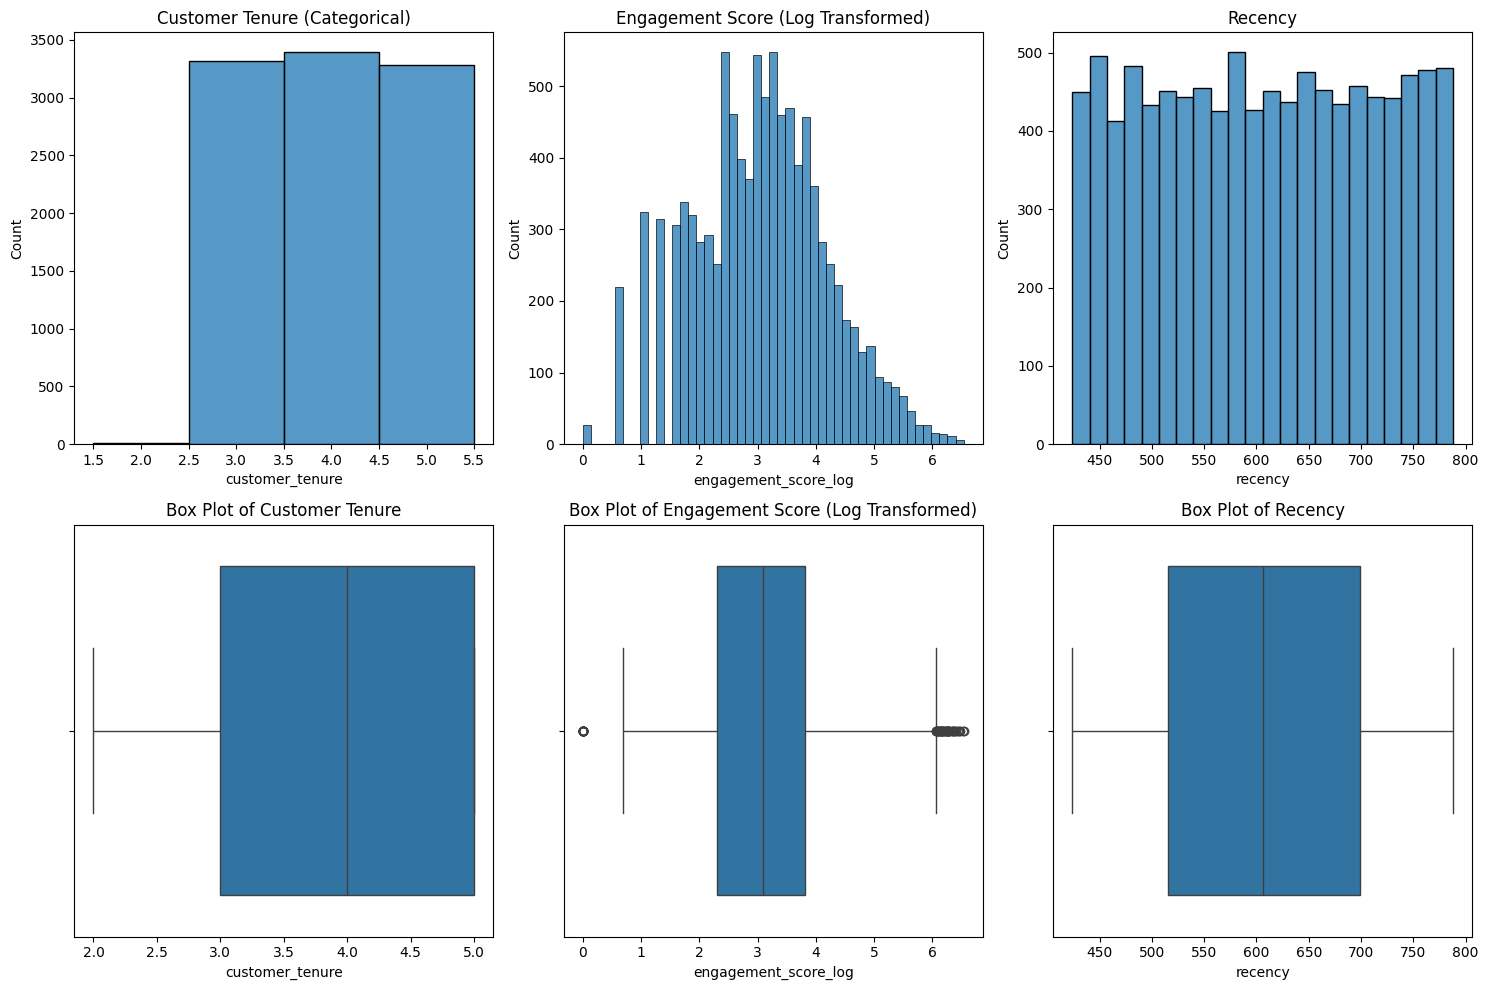

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(df_copy['customer_tenure'], ax=axes[0, 0])
axes[0, 0].set_title("Customer Tenure (Categorical)")

sns.histplot(df_copy['engagement_score_log'], ax=axes[0, 1])
axes[0, 1].set_title("Engagement Score (Log Transformed)")

sns.histplot(df_copy['recency'], ax=axes[0, 2])
axes[0, 2].set_title("Recency")

sns.boxplot(x=df_copy['customer_tenure'], ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of Customer Tenure")

sns.boxplot(x=df_copy['engagement_score_log'], ax=axes[1, 1])
axes[1, 1].set_title("Box Plot of Engagement Score (Log Transformed)")

sns.boxplot(x=df_copy['recency'], ax=axes[1, 2])
axes[1, 2].set_title("Box Plot of Recency")

plt.tight_layout()
plt.show()

In [13]:
# Copy dataset to avoid overwriting
df_feat = df_copy.copy()

### 1. Customer Tenure Groups ###
df_feat['customer_tenure_group'] = pd.cut(df_feat['customer_tenure'], 
                                          bins=[0, 2, 4, np.inf], 
                                          labels=['New', 'Medium', 'Loyal'])

### 2. Engagement Score Categorization ###
df_feat['engagement_category'] = pd.qcut(df_feat['engagement_score_log'], 
                                         q=3, 
                                         labels=['Low', 'Medium', 'High'])

### 3. Recency Features ###
df_feat['recently_active'] = np.where(df_feat['recency'] <= 60, 'Active', 'Inactive')

### 4. Moving Average of Engagement Score ###
df_feat['engagement_score_ma3'] = df_feat['engagement_score_log'].rolling(window=3, min_periods=1).mean()

# Display sample rows to verify changes
df_feat.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,...,avg_order_value_standardized,time_between_standardized,customer_tenure_standardized,recency_standardized,engagement_score_standardized,engagement_score_log,customer_tenure_group,engagement_category,recently_active,engagement_score_ma3
0,CUST_ZOHGIM,PROD_BLXS25,TRANS_GOAFF9,10,90.95,Sports,7,Asia,0.53,9092.45,...,-0.365781,-1.614022,1.233859,-0.979455,1.534444,4.875197,Loyal,High,Inactive,4.875197
1,CUST_JPDA4D,PROD_C2Y1TF,TRANS_I949BV,12,121.60,Electronics,30,South America,0.76,3714.99,...,0.222547,-0.683290,0.005405,1.298244,0.165337,3.912023,Medium,High,Inactive,4.393610
2,CUST_H4OVTS,PROD_VCTO6F,TRANS_35JLNS,17,39.01,Sports,74,Europe,0.13,7543.91,...,-1.362769,1.097239,1.233859,1.005262,-0.510765,2.302585,Loyal,Low,Inactive,3.696602
3,CUST_BHMQK8,PROD_VYFE4R,TRANS_LCR5YD,15,147.92,Sports,13,Europe,0.15,5912.27,...,0.727759,-1.371222,0.005405,-1.593772,2.227449,5.147494,Medium,High,Inactive,3.787368
4,CUST_HLL3ME,PROD_FUEF0J,TRANS_TLIXP9,17,151.54,Electronics,6,Asia,0.09,6497.19,...,0.797245,-1.654488,1.233859,-1.442556,6.588308,6.063785,Loyal,High,Inactive,4.504622


In [14]:
df_feat.to_csv('../data/processed_data.csv', index=False)